## 21.05.08 주간발표
- KLD, VI, 분포합 등
- 텍스트 데이터(스미싱) 전처리 Embedding 벡터 (unicode) 방법

## 1. Text Preprocessing

### 1.1 예제 데이터 (스미싱)

#### 스미싱 Case 1
- "엄마 나 폰 고장나서 수리맡기고 예전에 가입했던 문자나라로 문자하고있어. 피시용이라 문자만 가능해 부탁할거있어서 문자했어 엄마 확인하는데로 답장줘"

#### 스미싱 Case 2
- "엄마 바빠? 나지금 휴대폰 고장나서 매장에 수리맡기고 급한대로 예전에 내 명의로 가입해놧던 문자나라로 문자하고 있어 피씨용이라 문자만가능해 부탁이 좀잇어서 그러는데 확인하는대로 답장줘"

#### 오류데이터 (노래가사)
- 뭐 그대로야 난 다 잃어버린 것 같아 모든 게 맘대로 왔다가 인사도 없이 떠나 이대로는 무엇도 사랑하고 싶지 않아 다 해질 대로 해져버린


### 1.2 텍스트를 글자별 Unicode로 변환
- 특수문자, 띄어쓰기 제거 및 Unicode 변환
- Output : 각각의 길이가 다른 Vector
- 유니코드 : 가 -> 44032

In [1]:
from sklearn.preprocessing import MinMaxScaler

# text vector to unicode_vec
# 특수문자, 띄어쓰기 제거
def t_vec_processing(txt_vec):
    uni_vec = list(map(int, list(filter(lambda x : int(x)>=44032, txt_vec))))
    return uni_vec
    
# minMaxsCaler()
def uni_vec_minmax_scaler(uni_vec):
    scaler = MinMaxScaler()
    uni_vec = scaler.fit_transform(np.array([uni_vec]).reshape(-1, 1))
    return uni_vec.flatten()

txt_vec1 = [50628, 47560, 45208, 54256, 44256, 51109, 45208, 49436, 49688, 47532, 47585, 44592, 44256, 50696, 51204, 50640, 44032, 51077, 54664, 45912, 47928, 51088, 45208, 46972, 47196, 47928, 51088, 54616, 44256, 51080, 50612, 54588, 49884, 50857, 51060, 46972, 47928, 51088, 47564, 44032, 45733, 54644, 48512, 53441, 54624, 44144, 51080, 50612, 49436, 47928, 51088, 54664, 50612, 50628, 47560, 54869, 51064, 54616, 45716, 45936, 47196, 45813, 51109, 51480]
txt_vec2 = [50628, 47560, 48148, 48736, 63, 45208, 51648, 44552, 55092, 45824, 54256, 44256, 51109, 45208, 49436, 47588, 51109, 50640, 49688, 47532, 47585, 44592, 44256, 44553, 54620, 45824, 47196, 50696, 51204, 50640, 45236, 47749, 51032, 47196, 44032, 51077, 54644, 45479, 45912, 47928, 51088, 45208, 46972, 47196, 47928, 51088, 54616, 44256, 51080, 50612, 54588, 50472, 50857, 51060, 46972, 47928, 51088, 47564, 44032, 45733, 54644, 48512, 53441, 51060, 51328, 51079, 50612, 49436, 44536, 47084, 45716, 45936, 54869, 51064, 54616, 45716, 45824, 47196, 45813, 51109, 51480]
txt_vec3 = [50628, 47560, 44, 45208, 54256, 44256, 51109, 45208, 49436, 52980, 54504, 53552, 47196, 47928, 51088, 48372, 45236, 45716, 45936, 44553, 55176, 48512, 53441, 54624, 44172, 51080, 45716, 45936, 45813, 51109, 51480, 45236, 44032, 50724, 54980, 50640, 51460, 53580, 45768, 44620, 44592, 54532, 53944, 52852, 46300, 49324, 45796, 51460, 49688, 51080, 50612, 63]
error_vec1 = [47952, 44536, 45824, 47196, 50556, 45212, 45796, 51075, 50612, 48260, 47536, 44163, 44057, 50500, 47784, 46304, 44172, 47576, 45824, 47196, 50772, 45796, 44032, 51064, 49324, 46020, 50630, 51060, 46496, 45208, 51060, 45824, 47196, 45716, 47924, 50631, 46020, 49324, 46993, 54616, 44256, 49910, 51648, 50506, 50500, 45796, 54644, 51656, 45824, 47196, 54644, 51256, 48260, 47536]
#error_vec1 = [44592, 50613, 49549, 51012, 50668, 54665, 54644, 50864, 47532, 45716, 50724, 47116, 51648, 53468, 50577, 50500, 47000, 44536, 47548, 51088, 50630, 51060, 54632, 44760, 52644, 51012, 52656, 51221, 54644, 51652, 51060, 48324, 46384, 50948, 45716, 50630, 50612, 50500, 47492, 45796, 50912, 45912, 44536, 44592, 50613, 50640, 49436, 47564, 45208]

# unicode vector
uni_vec1 = t_vec_processing(txt_vec1)
uni_vec2 = t_vec_processing(txt_vec2)
uni_vec3 = t_vec_processing(txt_vec3)
e_uni_vec1 = t_vec_processing(error_vec1)

print('길이:', len(uni_vec1), uni_vec1, '\n')
print('길이:', len(uni_vec2), uni_vec2, '\n')
print('길이:', len(uni_vec3), uni_vec3, '\n')
print('길이:', len(e_uni_vec1), e_uni_vec1, '\n')


길이: 64 [50628, 47560, 45208, 54256, 44256, 51109, 45208, 49436, 49688, 47532, 47585, 44592, 44256, 50696, 51204, 50640, 44032, 51077, 54664, 45912, 47928, 51088, 45208, 46972, 47196, 47928, 51088, 54616, 44256, 51080, 50612, 54588, 49884, 50857, 51060, 46972, 47928, 51088, 47564, 44032, 45733, 54644, 48512, 53441, 54624, 44144, 51080, 50612, 49436, 47928, 51088, 54664, 50612, 50628, 47560, 54869, 51064, 54616, 45716, 45936, 47196, 45813, 51109, 51480] 

길이: 80 [50628, 47560, 48148, 48736, 45208, 51648, 44552, 55092, 45824, 54256, 44256, 51109, 45208, 49436, 47588, 51109, 50640, 49688, 47532, 47585, 44592, 44256, 44553, 54620, 45824, 47196, 50696, 51204, 50640, 45236, 47749, 51032, 47196, 44032, 51077, 54644, 45479, 45912, 47928, 51088, 45208, 46972, 47196, 47928, 51088, 54616, 44256, 51080, 50612, 54588, 50472, 50857, 51060, 46972, 47928, 51088, 47564, 44032, 45733, 54644, 48512, 53441, 51060, 51328, 51079, 50612, 49436, 44536, 47084, 45716, 45936, 54869, 51064, 54616, 45716, 45824, 47

### 1.3 평균 & 표준편차 구하기

In [22]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

v_m = [np.mean(i) for i in [uni_vec1, uni_vec2, uni_vec3, e_uni_vec1]]
v_std = [np.std(i) for i in [uni_vec1, uni_vec2, uni_vec3, e_uni_vec1]]

print('평균:', v_m, '\n표준편차:', v_std)

평균: [49281.078125, 48888.475, 49260.02, 48175.351851851854] 
표준편차: [3222.840087294355, 3178.273391225966, 3551.4820483285566, 2803.497003792647]


<hr>

## 2. MCMC Sampling 을 통한 분포 생성 
- 정규분포 Sampling
- NUTS 샘플러(No U-Turn Sampler) 
    - 학습시간에 효율적 
- 스미싱 예제 2개 각각 샘플링 분포 생성 (동일 조건)

### 2.1 스미싱 Case1 분포 생성
- Input : 스미싱 데이터 to Vector 
- Gelman-Rubin statistic 으로 수렴이 잘됬는지 확인

In [3]:
# Model Context 생성
with pm.Model() as model:

    # Continuous model
    mu = pm.Normal("normal", mu=v_m[0], sigma=v_std[0])
    obs = pm.Normal("text_obs1", mu=mu, sigma=v_std[0], observed=np.array(uni_vec1))

    # Posterior 에서 1000개의 Sample 추출,
    # 샘플러가 추가로 500번 반복하여 매개 변수 조정
    prior1 = pm.sample_prior_predictive()
    posterior1 = pm.sample(1000, tune=500, return_inferencedata=True)
    posterior_pred1 = pm.sample_posterior_predictive(posterior1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [normal]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 29 seconds.


In [24]:
prior1.keys()

dict_keys(['text_obs1', 'normal'])

In [4]:
# common metric, R-hat, as Gelman-Rubin statistic
# r_hat이 1에 가까워지면 마르코프 체인이 수렴한다는 것을 의미
import arviz as az
az.style.use("arviz-darkgrid")
az.summary(posterior1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
normal,49279.141,387.494,48576.852,50000.497,13.618,9.633,811.0,1333.0,1.0


In [5]:
# 샘플링 전후 값들
print(prior1.keys())
print(posterior_pred1.keys())

# 관측값들
# 500은 tune을 거쳐서 뽑아낸 
# 2000은 1000번씩 2개의 chain이 진행 한 결과
print(prior1['text_obs1'].shape)
print(posterior_pred1['text_obs1'].shape)

dict_keys(['text_obs1', 'normal'])
dict_keys(['text_obs1'])
(500, 64)
(2000, 64)


### 2.2 스미싱 Case 2 분포 생성
- "엄마 바빠? 나지금 휴대폰 고장나서 매장에 수리맡기고 급한대로 예전에 내 명의로 가입해놧던 문자나라로 문자하고 있어 피씨용이라 문자만가능해 부탁이 좀잇어서 그러는데 확인하는대로 답장줘"
- Gelman-Rubin statistic 으로 수렴이 잘됬는지 확인

In [6]:
# Model Context 생성
with pm.Model() as model:

    # Continuous model
    mu = pm.Normal("normal", mu=v_m[1], sigma=v_std[1])
    obs = pm.Normal("text_obs2", mu=mu, sigma=v_std[1], observed=np.array(uni_vec2))

    # Posterior 에서 1000개의 Sample 추출,
    # 샘플러가 추가로 500번 반복하여 매개 변수 조정
    prior2 = pm.sample_prior_predictive()
    posterior2 = pm.sample(1000, tune=500, return_inferencedata=True)
    posterior_pred2 = pm.sample_posterior_predictive(posterior2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [normal]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 28 seconds.


In [7]:
# common metric, R-hat, as Gelman-Rubin statistic
# r_hat이 1에 가까워지면 마르코프 체인이 수렴한다는 것을 의미
import arviz as az
az.style.use("arviz-darkgrid")
az.summary(posterior2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
normal,48899.458,352.584,48269.736,49537.81,12.757,9.025,784.0,1024.0,1.0


In [8]:
# 사전확률, 사후확률 
print(prior2.keys())
print(posterior_pred2.keys())

# 관측값들
# 500은 tune을 거쳐서 뽑아낸 
# 2000은 1000번씩 2개의 chain이 진행 한 결과
print(prior2['text_obs2'].shape)
print(posterior_pred2['text_obs2'].shape)

dict_keys(['text_obs2', 'normal'])
dict_keys(['text_obs2'])
(500, 80)
(2000, 80)


### 2.3 오류 Vector 분포 생성

In [9]:
# Model Context 생성
with pm.Model() as model:

    # Continuous model
    mu = pm.Normal("normal", mu=v_m[3], sigma=v_std[3])
    obs = pm.Normal("e_text_obs1", mu=mu, sigma=v_std[3], observed=np.array(e_uni_vec1))

    # Posterior 에서 1000개의 Sample 추출,
    # 샘플러가 추가로 500번 반복하여 매개 변수 조정
    e_prior1 = pm.sample_prior_predictive()
    e_posterior1 = pm.sample(1000, tune=500, return_inferencedata=True)
    e_posterior_pred1 = pm.sample_posterior_predictive(e_posterior1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [normal]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 26 seconds.


In [10]:
# common metric, R-hat, as Gelman-Rubin statistic
# r_hat이 1에 가까워지면 마르코프 체인이 수렴한다는 것을 의미
import arviz as az
az.style.use("arviz-darkgrid")
az.summary(e_posterior1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
normal,48181.907,392.387,47396.489,48846.701,13.362,9.451,864.0,1331.0,1.0


In [11]:
# 사전확률, 사후확률 
print(e_prior1.keys())
print(e_posterior_pred1.keys())

# 관측값들
# 500은 tune을 거쳐서 뽑아낸 
# 2000은 1000번씩 2개의 chain이 진행 한 결과
print(e_prior1['e_text_obs1'].shape)
print(e_posterior_pred1['e_text_obs1'].shape)

dict_keys(['e_text_obs1', 'normal'])
dict_keys(['e_text_obs1'])
(500, 54)
(2000, 54)


### 2.4. 분포 시각화
- plot 비교
- KLD를 통한 차이 비교

In [12]:
# 스미싱 1
az.summary(posterior1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
normal,49279.141,387.494,48576.852,50000.497,13.618,9.633,811.0,1333.0,1.0


In [13]:
# 스미싱 2
az.summary(posterior2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
normal,48899.458,352.584,48269.736,49537.81,12.757,9.025,784.0,1024.0,1.0


In [14]:
# 오류 1
az.summary(e_posterior1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
normal,48181.907,392.387,47396.489,48846.701,13.362,9.451,864.0,1331.0,1.0


array([[<AxesSubplot:title={'center':'normal'}>,
        <AxesSubplot:title={'center':'normal'}>]], dtype=object)

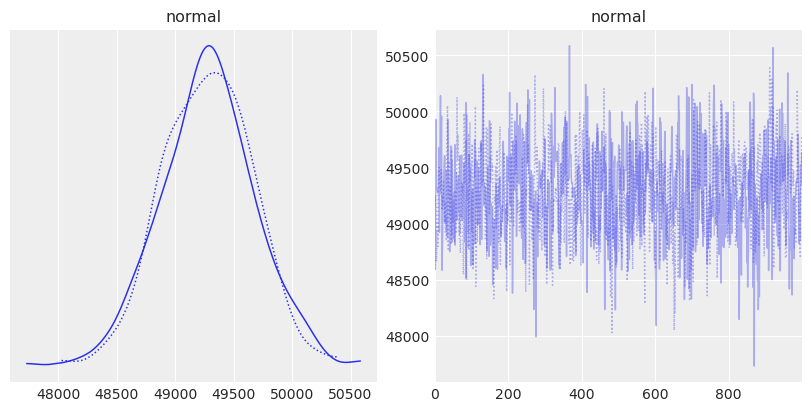

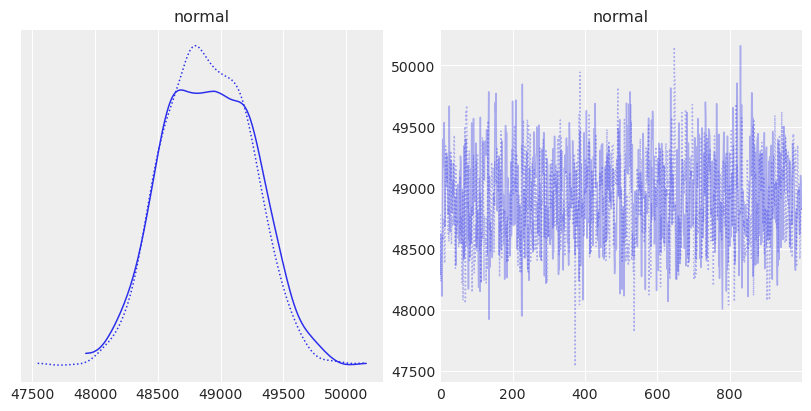

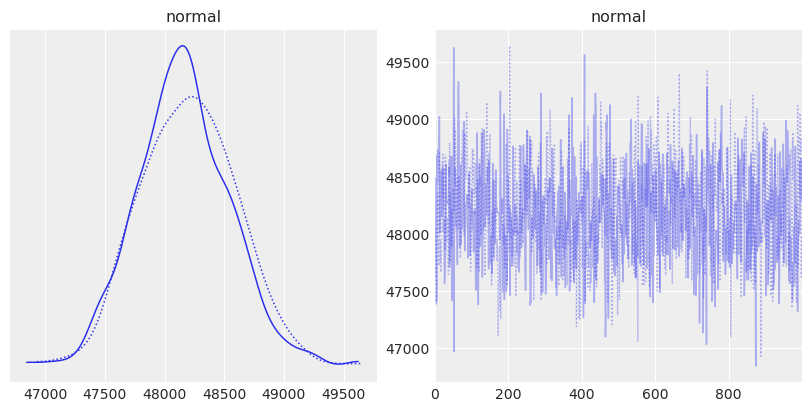

In [15]:
# 2개의 Chain에 대해 분포
import arviz as az
az.style.use("arviz-darkgrid")
az.plot_trace(posterior1, figsize=(8,4)) # 각각의 Chain에 대한 값들
az.plot_trace(posterior2, figsize=(8,4))
az.plot_trace(e_posterior1, figsize=(8,4))

# forestplot
#az.plot_forest(idata, r_hat=False);


<hr>

## 3. 분포합
- 정규분포의 가법성
    - 정규분포의 가법성이란 독립적인 두 개이상의 확률변수가 정규분포를 따를 때 이 확률변수들의 합은 (또 다른)정규분포

    - ex) A공장에서 생산된 막대기 평균: 10cm 표준편차: 3cm / B공장에서 생산된 막대기 평균: 7cm 표준편차: 2cm, 서로 독립
        - 새로운 분포의 평균은 17cm 분산은 9+4 = 13, 표준편차는 $sqrt(13)$
    
    
- https://ko.khanacademy.org/math/statistics-probability/random-variables-stats-library/combine-random-variables/v/analyzing-distribution-of-sum-of-two-normally-distributed-random-variables

In [16]:
# 분포합 평균
m_p1, m_p2 = az.summary(posterior1)['mean'].values, az.summary(posterior2)['mean'].values
all_pm = m_p1 + m_p2
print('분포합 평균', m_p1, m_p2, all_pm)

# 분포합 Std (표준편차)
std_p1, std_p2 = az.summary(posterior1)['sd'].values, az.summary(posterior2)['sd'].values
all_std = np.sqrt(std_p1**2 + std_p2**2)

print('분포합 표준편차', std_p1, std_p2, all_std)

분포합 평균 [49279.141] [48899.458] [98178.599]
분포합 표준편차 [387.494] [352.584] [523.89605562]


-  샘플링 된 값들을 어떻게 처리해야 되는지는 좀 고민, 아이디어 제시만

<hr>

## 4. KL Divergence
- 쿨백-라이블러 발산 (Kullback-Leibler divergence)은 두 확률분포 $p(y), q(y)$의 분포모양이 얼마나 다른지를 숫자로 계산한 값
- $KL(p||q)$로 표기 

![kld](img/kld.PNG)


- Scipy.stats 라이브러리로 정보량의 차이를 구하는 방식으로 KLD 방법 가능
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html

In [17]:
## KLD 함수
import scipy.stats as stats

# pk, qk -> 확률분포
def KLD(pk, qk):
    kld = stats.entropy(pk, qk)
#    print(stats.entropy(pk, base=2))
#    print(stats.entropy(qk, base=2))
    return kld

In [18]:
# 정보량의 차이
print(KLD([0.1, 0.1, 0.1], [0.5, 0.5, 0.5])) # 평행선
print(KLD([0.4, 0.7, 0.39, 0.9, 0.21], [0.11, 0.87, 0.99, 1.21, 2.45])) # 파동 vs 우상향 곡선

0.0
0.4720594045504467


#### 기존 만들어진 사전확률과 일반 타 데이터간의 KLD 차이가 얼마나 나느냐에 따라서 기준 값이 정해질 듯 

<hr>

## 5. Variational Inference 근사

- VI란 사후확률(posterior) 분포 p(z|x)를 다루기 쉬운 확률분포 q(z)로 근사하는 것

- 사전확률과 VI 사후확률 간의 KLD 비교
    - Error 데이터와 사전 확률 간의 KLD 비교
    - True 데이터와 사전 확률 간의 KLD 비교

### 5.1 스미싱 데이터 Variable Inference

Finished [100%]: Average Loss = 765.12


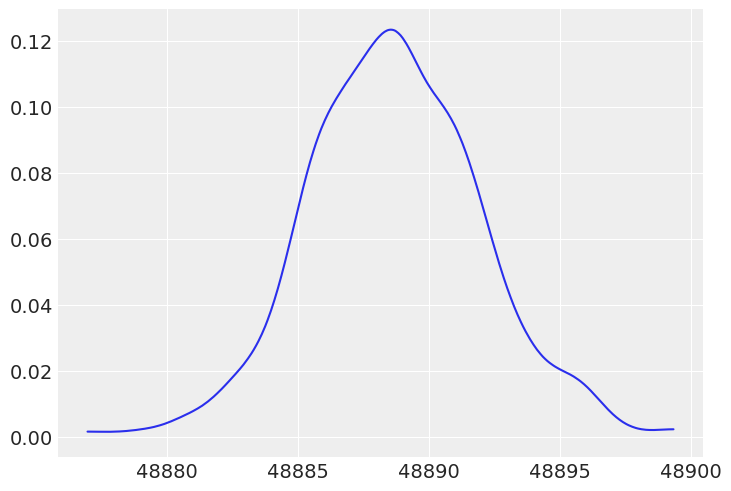

In [19]:
# Model Context 생성
with pm.Model() as model:
    # Continuous model
    mu = pm.Normal("normal", mu=v_m[1], sigma=v_std[1])
    obs = pm.Normal("text_obs2_vi", mu=mu, sigma=v_std[1], observed=np.array(uni_vec2))

    approx_o = pm.fit() # default meanfield
    
plt.figure()
trace_o = approx_o.sample(1000)
az.plot_dist(trace_o["normal"], figsize=(12,6));

### 5.2 Error data VI

Finished [100%]: Average Loss = 511.66


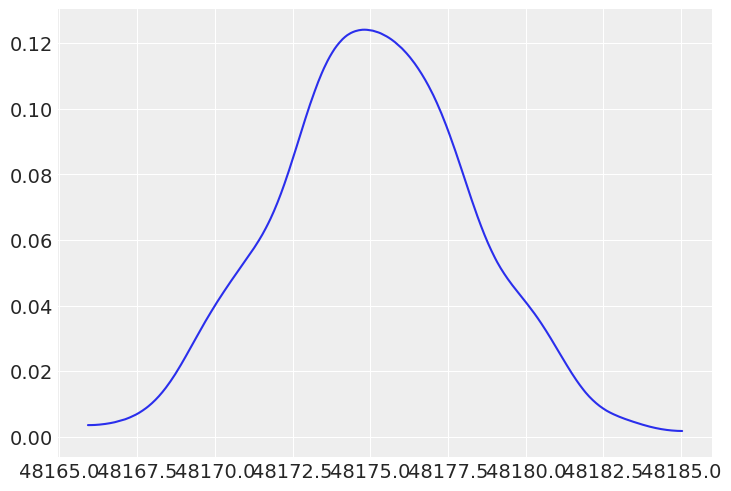

In [20]:
# Model Context 생성
with pm.Model() as model:
    # Continuous model
    mu = pm.Normal("normal", mu=v_m[3], sigma=v_std[3])
    obs = pm.Normal("e_text_obs1_vi", mu=mu, sigma=v_std[3], observed=np.array(e_uni_vec1))

    approx_x = pm.fit() # default meanfield
    
plt.figure()
trace_x = approx_x.sample(1000)
az.plot_dist(trace_x["normal"], figsize=(12,6));

### 3.3 Error vs True VI
- Error 데이터 True 데이터 Variable Inference 값 비교

In [21]:
print('ERROR:', KLD(e_posterior1['posterior']['normal'][0], trace_x['normal']))
print('TRUE:', KLD(posterior2['posterior']['normal'][0], trace_o['normal']))

ERROR: 3.2132486854738934e-05
TRUE: 2.7552434944966053e-05
